# Analysis of contingency tables

本节需要的包：

In [1]:
require(s20x)


载入需要的程辑包：s20x

Warning message:
"程辑包's20x'是用R版本4.2.3 来建造的"


## Introduction

分类统计表

In [2]:
AP.df <- read.table("../data/AttendPass.txt", header = T)
head(AP.df, 8)


,Subject,Pass,Attend
,<int>,<chr>,<chr>
1,1,pass,attend
2,2,pass,attend
3,3,pass,attend
4,4,pass,attend
5,5,pass,attend
6,6,fail,not.attend
7,7,pass,not.attend
8,8,fail,attend


In [3]:
AP.tbl <- with(AP.df, table(Attend, Pass))
AP.tbl


            Pass
Attend       fail pass
  attend       17   83
  not.attend   27   19

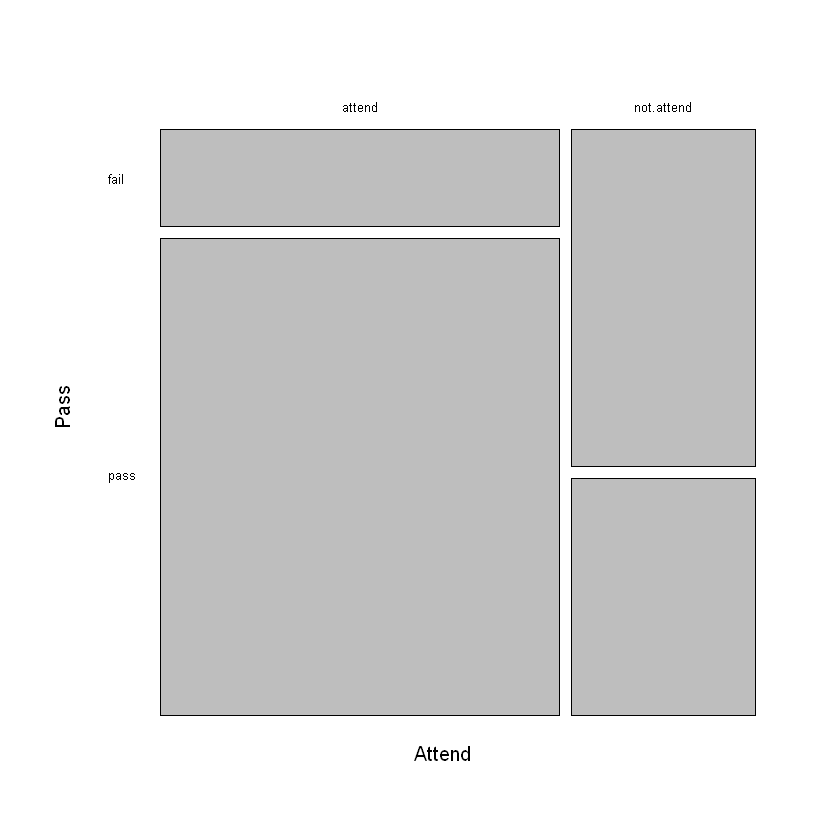

In [4]:
plot(AP.tbl, main = "", las = 1)


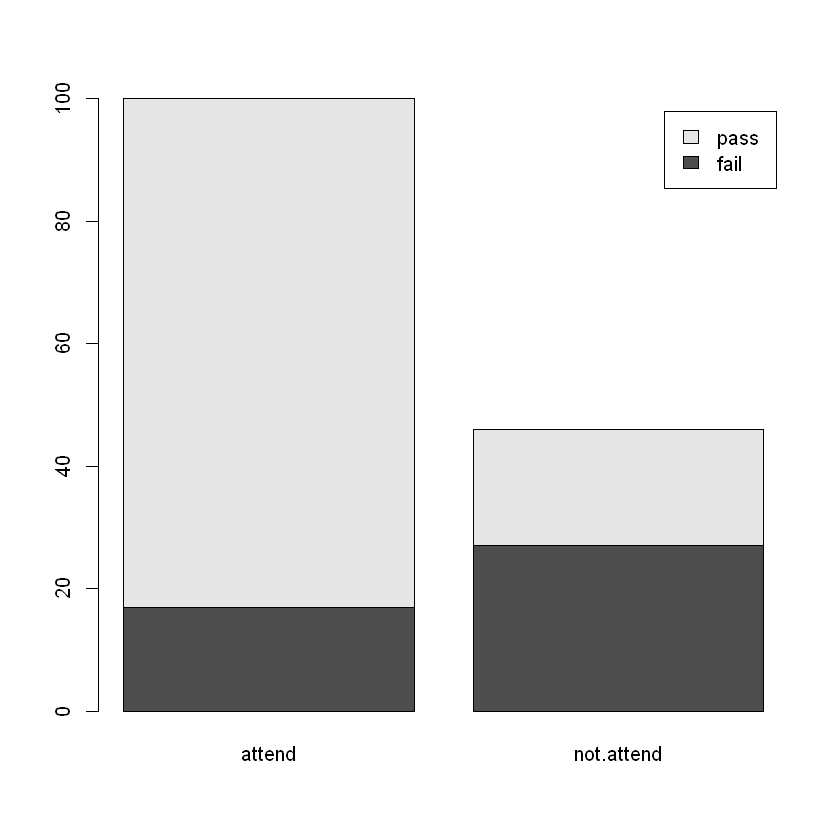

In [5]:
barplot(t(AP.tbl), legend = T)


## The binomial approach to contingency table analysis

In [6]:
Freqs.df <- data.frame(
    Attend = c("not.attend", "attend"),
    Fail = c(27, 17), Pass = c(19, 83)
)
Freqs.df <- transform(Freqs.df, Attend = factor(Attend))
Freqs.df


Attend,Fail,Pass
<fct>,<dbl>,<dbl>
not.attend,27,19
attend,17,83


In [7]:
AP.binom <- glm(cbind(Pass, Fail) ~ Attend, data = Freqs.df, family = binomial)
summary(AP.binom)



Call:
glm(formula = cbind(Pass, Fail) ~ Attend, family = binomial, 
    data = Freqs.df)

Deviance Residuals: 
[1]  0  0

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)        1.5856     0.2662   5.956 2.58e-09 ***
Attendnot.attend  -1.9370     0.4007  -4.834 1.34e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance:  2.5162e+01  on 1  degrees of freedom
Residual deviance: -4.2188e-15  on 0  degrees of freedom
AIC: 12.756

Number of Fisher Scoring iterations: 3


In [8]:
exp(confint(AP.binom))[2, ]


Waiting for profiling to be done...



2.5 %    97.5 % 
0.0642984 0.3111341

## The Poisson approach to contingency table analysis

In [9]:
library(dplyr)
AP.df <- read.table("../data/AttendPass.txt", header = T)
AP.df <- transform(AP.df, Pass = factor(Pass), Attend = factor(Attend))
Freqs2.df <- AP.df %>%
    group_by(Attend, Pass) %>%
    summarize(freq = n()) %>%
    data.frame()
Freqs2.df


Warning message:
"程辑包'dplyr'是用R版本4.2.3 来建造的"

载入程辑包：'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


`summarise()` has grouped output by 'Attend'. You can override using the
`.groups` argument.


Attend,Pass,freq
<fct>,<fct>,<int>
attend,fail,17
attend,pass,83
not.attend,fail,27
not.attend,pass,19


In [14]:
Freqs2.df$Attend <- relevel(Freqs2.df$Attend, ref = "not.attend")
AP.pois <- glm(freq ~ Attend * Pass, family = poisson, data = Freqs2.df)
summary(AP.pois)


,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),3.2958369,0.1924501,17.125671,9.550242e-66
Attendattend,-0.4626235,0.3096136,-1.494197,1.351243e-01
Passpass,-0.3513979,0.2994472,-1.173489,2.405999e-01
Attendattend:Passpass,1.9370252,0.4006749,4.834407,1.335434e-06


Attendattend:Passpass 
              6.93808

Null deviance 叫做零模型自由度，Residual deviance 叫做残差自由度。

残差自由度等于零时，参数个数等于该数据的行数。由此可以推出原数据有 4 行。

In [11]:
exp(confint(AP.pois))[4, ]


Waiting for profiling to be done...



2.5 %    97.5 % 
 3.214049 15.552487

## Equivalence of the binomial and Poisson approaches

In [12]:
Freqs.df
exp(confint(AP.pois))[4, ]


Attend,Fail,Pass
<fct>,<dbl>,<dbl>
not.attend,27,19
attend,17,83


Waiting for profiling to be done...



2.5 %    97.5 % 
 3.214049 15.552487

In [13]:
predict(AP.pois, type = "response")


1  2  3  4 
17 83 27 19

In [15]:
Freqs.df
coef(summary(AP.pois))
exp(coef(AP.pois))[4]


Attend,Fail,Pass
<fct>,<dbl>,<dbl>
not.attend,27,19
attend,17,83


,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),3.2958369,0.1924501,17.125671,9.550242e-66
Attendattend,-0.4626235,0.3096136,-1.494197,1.351243e-01
Passpass,-0.3513979,0.2994472,-1.173489,2.405999e-01
Attendattend:Passpass,1.9370252,0.4006749,4.834407,1.335434e-06


Attendattend:Passpass 
              6.93808

In [ ]:
options(digits = 4)
OR <- 27 * 83 / (17 * 19)
OR
